In [2]:
import numpy
import math
from scipy import integrate
from matplotlib import pyplot
%matplotlib inline

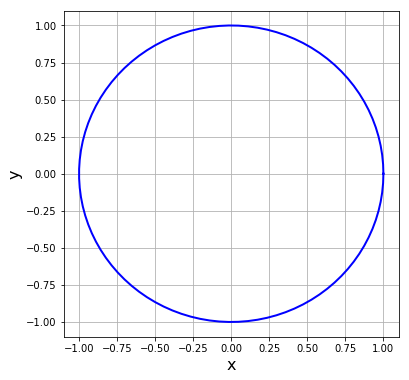

In [4]:
u_inf=1.0

# define the geometry
R=1.0
x_center, y_center = 0.0, 0.0
theta = numpy.linspace(0.0, 2*math.pi, num=100)
x_cylinder, y_cylinder = x_center + R*numpy.cos(theta),\
y_center + R*numpy.sin(theta)

# plot the cylinder
size = 6
pyplot.figure(figsize=(size, size))
pyplot.grid()
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.plot(x_cylinder, y_cylinder, color='b', linestyle='-', linewidth=2)
pyplot.xlim(-1.1, 1.1)
pyplot.ylim(-1.1, 1.1);

In [7]:
# create the panels on the cylinder
class Panel:
    
    def __init__(self, xa, ya, xb, yb):
        self.xa, self.ya = xa, ya
        self.xb, self.yb = xb, yb
        
        self.xc, self.yc = (xa+xb)/2, (ya+yb)/2 #center point
        self.length = math.sqrt((xb-xa)**2+(yb-ya)**2) #length of panel
        
        # angle of the panel: beta
        if xb-xa <= 0.:
            self.beta = math.acos((yb-ya)/self.length)
        elif xb-xa > 0.:
            self.beta = math.pi + math.acos(-(yb-ya)/self.length)
        
        self.sigma = 0.0 # source strength
        self.vt = 0.0 # tangential velocity
        self.cp = 0.0 # pressure coefficient

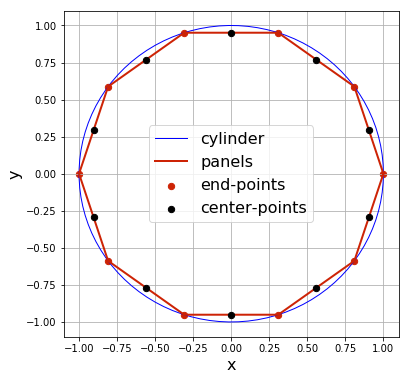

In [12]:
# now we want to store the panels in a numpy array

N_panels = 10 # number of panels

# define the end points
x_ends = R*numpy.cos(numpy.linspace(0.0, 2*math.pi, N_panels+1))
y_ends = R*numpy.sin(numpy.linspace(0.0, 2*math.pi, N_panels+1))

# we do N_panels+1 because we need 10 panels (or 10 in-between
# spaces) so we do N+1 to get 11 points with 10 in-between spaces

# define the panels
panels = numpy.empty(N_panels, dtype=object)

for i in range (N_panels):
    panels[i] = Panel(x_ends[i], y_ends[i], x_ends[i+1], y_ends[i+1])
    
# plot it
size = 6
pyplot.figure(figsize=(size, size))
pyplot.grid()
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.plot(x_cylinder, y_cylinder,
            label='cylinder',
            color='b', linestyle='-', linewidth=1)
pyplot.plot(x_ends, y_ends,
            label='panels',
            color='#CD2305', linestyle='-', linewidth=2)
pyplot.scatter([p.xa for p in panels], [p.ya for p in panels],
               label='end-points',
               color='#CD2305', s=40)
pyplot.scatter([p.xc for p in panels], [p.yc for p in panels],
               label='center-points',
               color='k', s=40, zorder=3)
pyplot.legend(loc='best', prop={'size':16})
pyplot.xlim(-1.1, 1.1)
pyplot.ylim(-1.1, 1.1);

In [14]:
# now we want to solve the normal velocity = 0 for each panel

def integral_normal(p_i, p_j):
    def integrand(s):
        return (((p_i.xc - (p_j.xa - math.sin(p_j.beta) * s)) * math.cos(p_i.beta) +
                 (p_i.yc - (p_j.ya + math.cos(p_j.beta) * s)) * math.sin(p_i.beta)) /
                ((p_i.xc - (p_j.xa - math.sin(p_j.beta) * s))**2 +
                 (p_i.yc - (p_j.ya + math.cos(p_j.beta) * s))**2))
    return integrate.quad(integrand, 0.0, p_j.length)[0]

In [ ]:
# now we want to compute the 